In [1]:
# !pip install yahoo-finance
# !pip install pandas-datareader
# (035720.KS)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-06,107000.0,105000.0,106500.0,106000.0,1888595.0,106000.0
2021-09-07,106000.0,104000.0,105500.0,104500.0,2547667.0,104500.0
2021-09-08,107500.0,103500.0,104000.0,106000.0,2891267.0,106000.0
2021-09-09,106000.0,103000.0,105000.0,103000.0,3233011.0,103000.0
2021-09-10,105500.0,103000.0,103500.0,105000.0,1999369.0,105000.0


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


<AxesSubplot:xlabel='Date'>

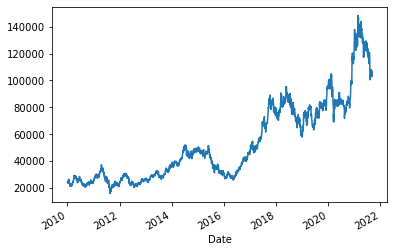

In [2]:
# 한국 주식 데이터 가져오기
# pip install yahoo-finance
# pip install pandas-datareader

from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

start_date = '2010-01-04'
end_date = '2021-09-10'

# SK 하이닉스 주식 데이터 가져오기
skhynix = data.DataReader('000660.ks', 'yahoo', start_date, end_date)
type(skhynix )   # <class 'pandas.core.frame.DataFrame'>
display(skhynix.tail())
print(type(skhynix.index))  # <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
skhynix['Close'].plot()

In [3]:
skhynix.to_csv('stock_hynix.csv', header=False)

In [4]:
# hive 에 생성된 userdb.employee 테이블로 부터 데이터를 가져오는 예
from pyhive import hive
import pandas as pd
import sys

conn = hive.Connection(host="localhost", port=10000, username="hdoop")

cursor = conn.cursor()
df = pd.read_sql("SELECT * FROM userdb.employee", conn)

# MapReduce 프레임워크의 작동을 테스트하려면 아래 처럼 계산이 필요한 커리를 사용한다
#df = pd.read_sql("SELECT AVG(salary) FROM userdb.employee", conn)
display (df.head())

conn.close()

,employee.eid,employee.name,employee.salary,employee.destination
0,1201,Gopal,45000,Technical manager
1,1202,Manisha,45000,Proof reader
2,1203,Masthanvali,40000,Technical writer
3,1204,Kiran,40000,Hr Admin
4,1205,Kranthi,30000,Op


In [5]:
#Date,High,Low,Open,Close,Volume,Adj Close
from pyhive import hive
import pandas as pd
import sys

conn = hive.Connection(host="localhost", port=10000, username="hdoop")

cursor = conn.cursor()
cursor.execute('use userdb')

hql = """CREATE TABLE IF NOT EXISTS stock_data2 ( 
sdate string, shigh float, slow float, open float, 
close float, volume float, adjclose float)
COMMENT 'stock data'
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
STORED AS TEXTFILE
TBLPROPERTIES ('NO_AUTO_COMPACTION'='true')"""

cursor.execute(hql)

print('stock_data Table Created')

conn.close()

stock_data Table Created


In [9]:
#Date,High,Low,Open,Close,Volume,Adj Close
from pyhive import hive
import pandas as pd
import sys

conn = hive.Connection(host="localhost", port=10000, username="hdoop")

cursor = conn.cursor()

hql = "LOAD DATA LOCAL INPATH  '/home/hdoop/py-scripts/stock_hynix.csv' OVERWRITE INTO TABLE userdb.stock_data2"
try:
    cursor.execute(hql)
except exception as e:
    print(e)
    
conn.close()
print('LOAD DATA ok!')

LOAD DATA ok!


In [12]:
#Date,High,Low,Open,Close,Volume,Adj Close
from pyhive import hive
import pandas as pd
import sys

conn = hive.Connection(host="localhost", port=10000, username="hdoop")

cursor = conn.cursor()

hql = 'SELECT * FROM userdb.stock_data2'

df = pd.read_sql(hql, conn)

display (df.head())

conn.close()
print('Lines:', len(df))

,stock_data2.sdate,stock_data2.shigh,stock_data2.slow,stock_data2.open,stock_data2.close,stock_data2.volume,stock_data2.adjclose
0,2010-01-04,24150.0,23350.0,23350.0,24100.0,7327477.0,21525.570
1,2010-01-05,24900.0,23050.0,24500.0,23350.0,12080229.0,20855.684
2,2010-01-06,24550.0,23600.0,23700.0,24550.0,7698642.0,21927.500
3,2010-01-07,25200.0,24350.0,25000.0,24400.0,11059707.0,21793.521
4,2010-01-08,24850.0,23450.0,24650.0,24650.0,9686656.0,22016.816


Lines: 2882


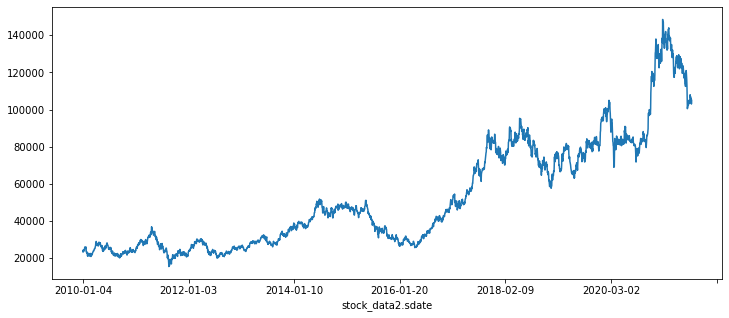

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

close = np.array(df['stock_data2.close']).reshape(-1,1)
df4chart = pd.DataFrame(close, columns=['Close'],
                       index=df['stock_data2.sdate'])

plt.figure(figsize=(12,5))
df4chart['Close'].plot()

plt.show()

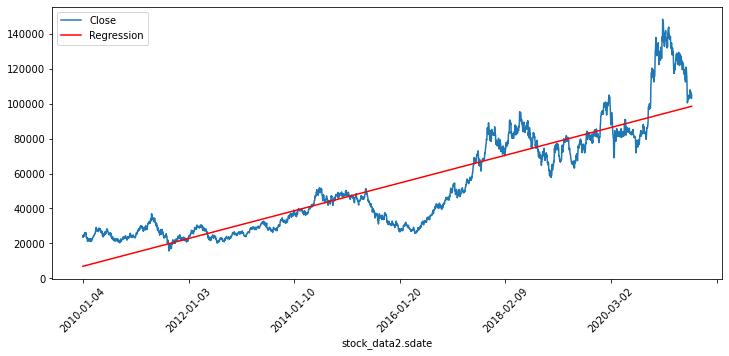

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()

x = np.arange(len(df4chart)).reshape(-1,1)
y = np.array(df4chart['Close']).reshape(-1,1)

model.fit(x,y)
pred_y = model.predict(x)

plt.figure(figsize=(12,5))

df4chart['Pred-Y'] = pred_y

df4chart['Close'].plot(label='Close')
df4chart['Pred-Y'].plot(c='r',label='Regression')

plt.xticks(rotation=45)
plt.legend()

plt.show()

In [19]:
# 문자열로 표현된 날짜를 datatime 오브젝트로 변환
# DataFrame의 인덱스로 datetime을 사용하면 자동으로 xtic이 날짜로 출력된다
from datetime import datetime

datetime_str = '2021/10/13 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%Y/%m/%d %H:%M:%S')

print(type(datetime_object))  # <class 'datetime.datetime'>

print(datetime_object)  # printed in default format, 2021-10-13 13:55:26

<class 'datetime.datetime'>
2021-10-13 13:55:26


In [20]:
# 문자열로 표현된 날짜 배열을 datetime으로 변환
from datetime import datetime

dates = ['2021-10-13', '2021-10-14']
dates_list = [datetime.strptime(date, "%Y-%m-%d").date() for date in dates]
dates_list

[datetime.date(2021, 10, 13), datetime.date(2021, 10, 14)]

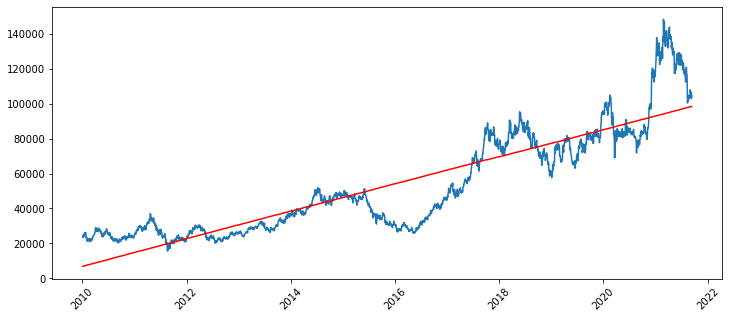

In [22]:
# 날짜를 DataFrame의 인덱스로 설정하고 2개의 라인 차트 그리기

dt_tm = datetime.strptime('2021-10-13', "%Y-%m-%d")   # <class 'datetime.datetime'>
type(dt_tm.date())  # <class 'datetime.date'>

dates = df['stock_data2.sdate']
dates_list = [datetime.strptime(date, "%Y-%m-%d").date() for date in dates]
df4chart.index = dates_list  #인덱스에 datetime 오브젝트를 설정한다

# 축에 보여질 날짜를 공유하는 모든 정보는 한 DataFrame안에 컬럼으로 있어야 한다
plt.figure(figsize=(12,5))
df4chart['pred-y'] = pred_y  
df4chart['Close'].plot()
df4chart['pred-y'].plot(c='r')
plt.xticks(rotation=45)
plt.show()

In [23]:
#Date,High,Low,Open,Close,Volume,Adj Close
from pyhive import hive
import pandas as pd
import sys

conn = hive.Connection(host="localhost", port=10000, username="hdoop")

cursor = conn.cursor()
cursor.execute('use userdb')

hql = """CREATE TABLE IF NOT EXISTS stock_data2 ( 
sdate string, shigh float, slow float, open float, 
close float, volume float, adjclose float)
COMMENT 'stock data'
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
STORED AS TEXTFILE
TBLPROPERTIES ('NO_AUTO_COMPACTION'='true')"""

cursor.execute(hql)

print('stock_data Table Created')

conn.close()

stock_data Table Created


In [24]:
#Date,High,Low,Open,Close,Volume,Adj Close
from pyhive import hive
import pandas as pd
import sys

conn = hive.Connection(host="localhost", port=10000, username="hdoop")

cursor = conn.cursor()
cursor.execute('use userdb')

hql = """DROP TABLE stock_data2"""

cursor.execute(hql)

print('stock_data Table Dropped')

conn.close()

stock_data Table Dropped
